<a href="https://colab.research.google.com/github/Harleen8118/Machine_Learning_Lab/blob/main/CustomerSegmentation_using_unsupervised_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised Machine Learning for Customer Market Segmentation



In [ ]:
# Import Necessary Libraries
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

import sklearn
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
import scipy.cluster.hierarchy as shc
import plotly.express as px

from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA, FactorAnalysis
from scipy.cluster.hierarchy import dendrogram, linkage


## Data Collection and Preprocessing

In [ ]:
# Load the dataset

df = pd.read_csv("CC GENERAL.csv")
test_data = pd.read_csv("Testdata.csv")

### Understanding Customer Market Dataset
| Column Name                        | Column Description                                                           |
|------------------------------------|------------------------------------------------------------------------------|
| CUST_ID                            | Identifier for the customer                                                  |
| BALANCE                            | The amount of money owed by the customer to the credit card company         |
| BALANCE_FREQUENCY                  | How frequently the balance is updated, score between 0 and 1                |
| PURCHASES                          | Amount of purchases made from account                                       |
| ONEOFF_PURCHASES                   | Maximum purchase amount done in one-go                                      |
| INSTALLMENTS_PURCHASES             | Amount of purchase done in installment                                      |
| CASH_ADVANCE                       | Cash in advance given by the user                                           |
| PURCHASES_FREQUENCY                | How frequently the Purchases are being made, score between 0 and 1          |
| ONEOFF_PURCHASES_FREQUENCY         | How frequently Purchases are happening in one-go                            |
| PURCHASES_INSTALLMENTS_FREQUENCY   | How frequently purchases in installments are being done                     |
| CASH_ADVANCE_FREQUENCY             | How frequently the cash in advance being paid                               |
| CASH_ADVANCE_TRX                   | Number of Transactions made with "Cash in Advance"                          |
| PURCHASES_TRX                      | Number of purchase transactions made                                        |
| CREDIT_LIMIT                       | Limit of Credit Card for user                                               |
| PAYMENTS                           | Amount of Payment done by user                                              |
| MINIMUM_PAYMENTS                   | Minimum amount of payments made by user                                     |
| PRC_FULL_PAYMENT                   | Percent of full payment paid by user                                        |
| TENURE                             | Tenure of credit card service for user     

----



The dataset contains 18 variables; there are related  that do not have any quantitative impact in the analysis. Hence, such columns can be remove and this leaves 17 variables to work with.


In [ ]:
df.drop("CUST_ID",axis=1,inplace=True)

### Data Cleaning; Transformation & Feature Selection
This part of Data Preprocessing, which involves transforming raw data into a proper form for a  better understandable format. The stages of Data Preprocessing involves: Data cleaning, Data integration, Data reduction, and Data transformation.
To have a sense of the data's format and content - let’s print the data summary and sample (first 5 entries; shape; size and info).


In [ ]:
df

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8945    28.493517           1.000000     291.12              0.00   
8946    19.183215           1.000000     300.00              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000        864.206542          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365          0.500000       6  
8946   275.861322        864.206542          0.000000       6  
8947    81

In [ ]:
test_data

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     16.834929           0.454545      15.00             15.00   
1    540.020858           1.000000     612.23            495.61   
2    119.237712           1.000000     342.74              0.00   
3    894.081947           1.000000    1901.71           1853.11   
4   1294.145453           1.000000    3059.10           1836.98   
..          ...                ...        ...               ...   
95   871.499977           1.000000      20.00             20.00   
96  1322.647480           1.000000     799.92              0.00   
97   349.441102           1.000000    1975.40           1393.50   
98   107.600851           1.000000    1461.15           1034.03   
99  6022.224462           1.000000       0.00              0.00   

    INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                     0.00    209.025389             0.090909   
1                   116.62   1708.923217             0.666667   
2                   342.74      0.000000             1.000000   
3                    48.60    206.618780             0.666667   
4                  1222.12      0.000000             1.000000   
..                     ...           ...                  ...   
95                    0.00    197.024597             0.083333   
96                  799.92      0.000000             1.000000   
97                  581.90      0.000000             0.666667   
98                  427.12      0.000000             1.000000   
99                    0.00   4111.465632             0.000000   

    ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                     0.090909                          0.000000   
1                     0.166667                          0.500000   
2                     0.000000                          1.000000   
3                     0.666667                          0.416667   
4                     0.416667                          1.000000   
..                         ...                               ...   
95                    0.083333                          0.000000   
96                    0.000000                          1.000000   
97                    0.416667                          0.333333   
98                    1.000000                          0.916667   
99                    0.000000                          0.000000   

    CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                 0.090909                 1              1        7500.0   
1                 0.333333                10             10        2000.0   
2                 0.000000                 0             20        2000.0   
3                 0.083333                 1             33        1500.0   
4                 0.000000                 0             42        7000.0   
..                     ...               ...            ...           ...   
95                0.333333                 5              1        2000.0   
96                0.000000                 0             20        1000.0   
97                0.000000                 0             17        4000.0   
98                0.000000                 0             33        7500.0   
99                0.166667                 6              0        7000.0   

       PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0    430.213001         86.959785          0.000000      11  
1   1642.068707        419.956251          0.000000      12  
2    327.166041        165.207233          0.000000      12  
3    947.130141        220.745296          0.000000      12  
4   5560.033502        497.637767          0.083333      12  
..          ...               ...               ...     ...  
95   278.265172        277.580245          0.000000      12  
96   469.485706       9299.951204          0.000000      12  
97  1795.012223        167.219681          0.000000      12  
98  1334.893122        193.531249          0.833333      12 

**Next 🡪 Let’s have a look at the Data shape; Size; Type & Missing Values:** this steps are important to have a good understanding of our data.
* **Data shape  :** Allow to have an understanding of the dataset shape, and this is important in the data analysis and preprocessing:

The dataset have :(8950, 18); meaning 8950 rows and 18 columns/features

In [ ]:
df.shape

(8589, 17)

Data info : Describe a concise summary of a dataset, by providing essential information in term of a structure content of the dataset. (Ref to Table 1 )


Data Types: This section aim to see the kind of data each column contains in the dataset (Ref to Table 1 )


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

Data Types: This section aim to see the kind of data each column contains in the dataset (Ref to Table 1 )


In [ ]:
df.dtypes

BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

<Axes: >

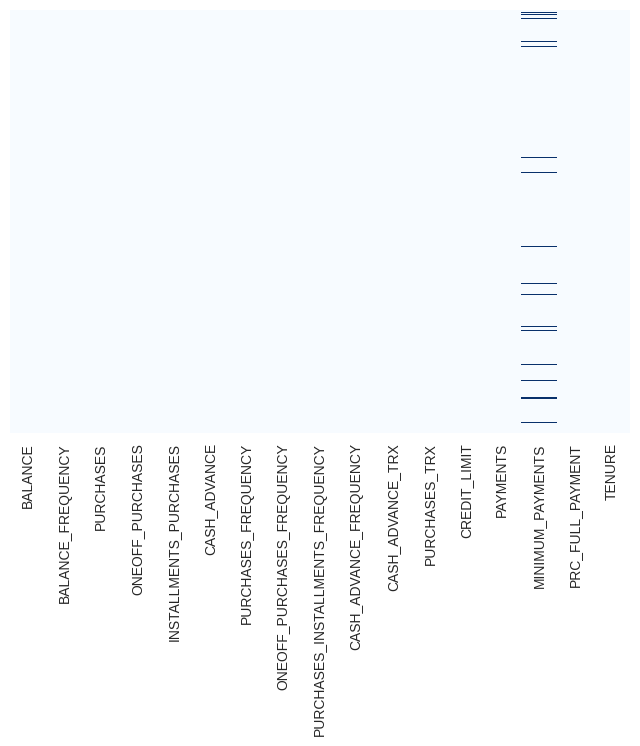

In [ ]:
# check for null value using heatmap
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="Blues")

**Missing Values:** Handling missing values is an important step in data preprocessing, especially for customer segmentation.

Ref to Table 1; there is just 2 missing values


In [ ]:
df.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
test_data.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Approach to find all columns having missing values;


In [ ]:
# find all columns having missing values

missing_var=[var for var in df.columns if df[var].isnull().sum()>0]
missing_var

['CREDIT_LIMIT', 'MINIMUM_PAYMENTS']

To clean the missing values; we have applied the missing value with the mean.


In [ ]:
missing_var=[var for var in test_data.columns if test_data[var].isnull().sum()>0]
missing_var

[]

In [ ]:
# Preprocess the data - Impute missing values if necessary

df["MINIMUM_PAYMENTS"].fillna(df["MINIMUM_PAYMENTS"].mean(),inplace=True)
df["CREDIT_LIMIT"].fillna(df["CREDIT_LIMIT"].mean(),inplace=True)

In [ ]:
test_data.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          1
PURCHASES_INSTALLMENTS_FREQUENCY    1
CASH_ADVANCE_FREQUENCY              1
CASH_ADVANCE_TRX                    1
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    1
dtype: int64

In [ ]:
df.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [ ]:
test_data.duplicated().any()

False

In [ ]:
df.duplicated().any()

False

**Statistical Description of the Dataset:** The function df.describe() 🡪 returns important descriptive statistical summaries focusing only on numerical columns, excluding NaN values (if available).
In our function, it gives an average (mean), the range (min to max), and the spread (std).


In [ ]:
df.describe().T

count         mean          std        min  \
BALANCE                           8950.0  1564.474828  2081.531879   0.000000   
BALANCE_FREQUENCY                 8950.0     0.877271     0.236904   0.000000   
PURCHASES                         8950.0  1003.204834  2136.634782   0.000000   
ONEOFF_PURCHASES                  8950.0   592.437371  1659.887917   0.000000   
INSTALLMENTS_PURCHASES            8950.0   411.067645   904.338115   0.000000   
CASH_ADVANCE                      8950.0   978.871112  2097.163877   0.000000   
PURCHASES_FREQUENCY               8950.0     0.490351     0.401371   0.000000   
ONEOFF_PURCHASES_FREQUENCY        8950.0     0.202458     0.298336   0.000000   
PURCHASES_INSTALLMENTS_FREQUENCY  8950.0     0.364437     0.397448   0.000000   
CASH_ADVANCE_FREQUENCY            8950.0     0.135144     0.200121   0.000000   
CASH_ADVANCE_TRX                  8950.0     3.248827     6.824647   0.000000   
PURCHASES_TRX                     8950.0    14.709832    24.857649   0.000000   
CREDIT_LIMIT                      8950.0  4494.449450  3638.612411  50.000000   
PAYMENTS                          8950.0  1733.143852  2895.063757   0.000000   
MINIMUM_PAYMENTS                  8950.0   864.206542  2330.588021   0.019163   
PRC_FULL_PAYMENT                  8950.0     0.153715     0.292499   0.000000   
TENURE                            8950.0    11.517318     1.338331   6.000000   

                                          25%          50%          75%  \
BALANCE                            128.281915   873.385231  2054.140036   
BALANCE_FREQUENCY                    0.888889     1.000000     1.000000   
PURCHASES                           39.635000   361.280000  1110.130000   
ONEOFF_PURCHASES                     0.000000    38.000000   577.405000   
INSTALLMENTS_PURCHASES               0.000000    89.000000   468.637500   
CASH_ADVANCE                         0.000000     0.000000  1113.821139   
PURCHASES_FREQUENCY                  0.083333     0.500000     0.916667   
ONEOFF_PURCHASES_FREQUENCY           0.000000     0.083333     0.300000   
PURCHASES_INSTALLMENTS_FREQUENCY     0.000000     0.166667     0.750000   
CASH_ADVANCE_FREQUENCY               0.000000     0.000000     0.222222   
CASH_ADVANCE_TRX                     0.000000     0.000000     4.000000   
PURCHASES_TRX                        1.000000     7.000000    17.000000   
CREDIT_LIMIT                      1600.000000  3000.000000  6500.000000   
PAYMENTS                           383.276166   856.901546  1901.134317   
MINIMUM_PAYMENTS                   170.857654   335.628312   864.206542   
PRC_FULL_PAYMENT                     0.000000     0.000000     0.142857   
TENURE                              12.000000    12.000000    12.000000   

                                          max  
BALANCE                           19043.13856  
BALANCE_FREQUENCY                     1.00000  
PURCHASES                         49039.57000  
ONEOFF_PURCHASES                  40761.25000  
INSTALLMENTS_PURCHASES            22500.00000  
CASH_ADVANCE                      47137.21176  
PURCHASES_FREQUENCY                   1.00000  
ONEOFF_PURCHASES_FREQUENCY            1.00000  
PURCHASES_INSTALLMENTS_FREQUENCY      1.00000  
CASH_ADVANCE_FREQUENCY                1.50000  
CASH_ADVANCE_TRX                    123.00000  
PURCHASES_TRX                       358.00000  
CREDIT_LIMIT                      30000.00000  
PAYMENTS                          50721.48336  
MINIMUM_PAYMENTS                  76406.20752  
PRC_FULL_PAYMENT                      1.00000  
TENURE                               12.00000

## Exploratory Data Analysis (EDA)


----



### Data Visualization

To have a better understanding of our dataset, different data visualizations were plotted.

#### Plotting - Customer Market Segmentation Dataset Pairplot

The pairplot data visualization generates a comprehensive overview of how every numeric variable in the dataset relates to others, alongside showing their individual distributions.

In [ ]:
df

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8945    28.493517           1.000000     291.12              0.00   
8946    19.183215           1.000000     300.00              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000        864.206542          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365          0.500000       6  
8946   275.861322        864.206542          0.000000       6  
8947    81

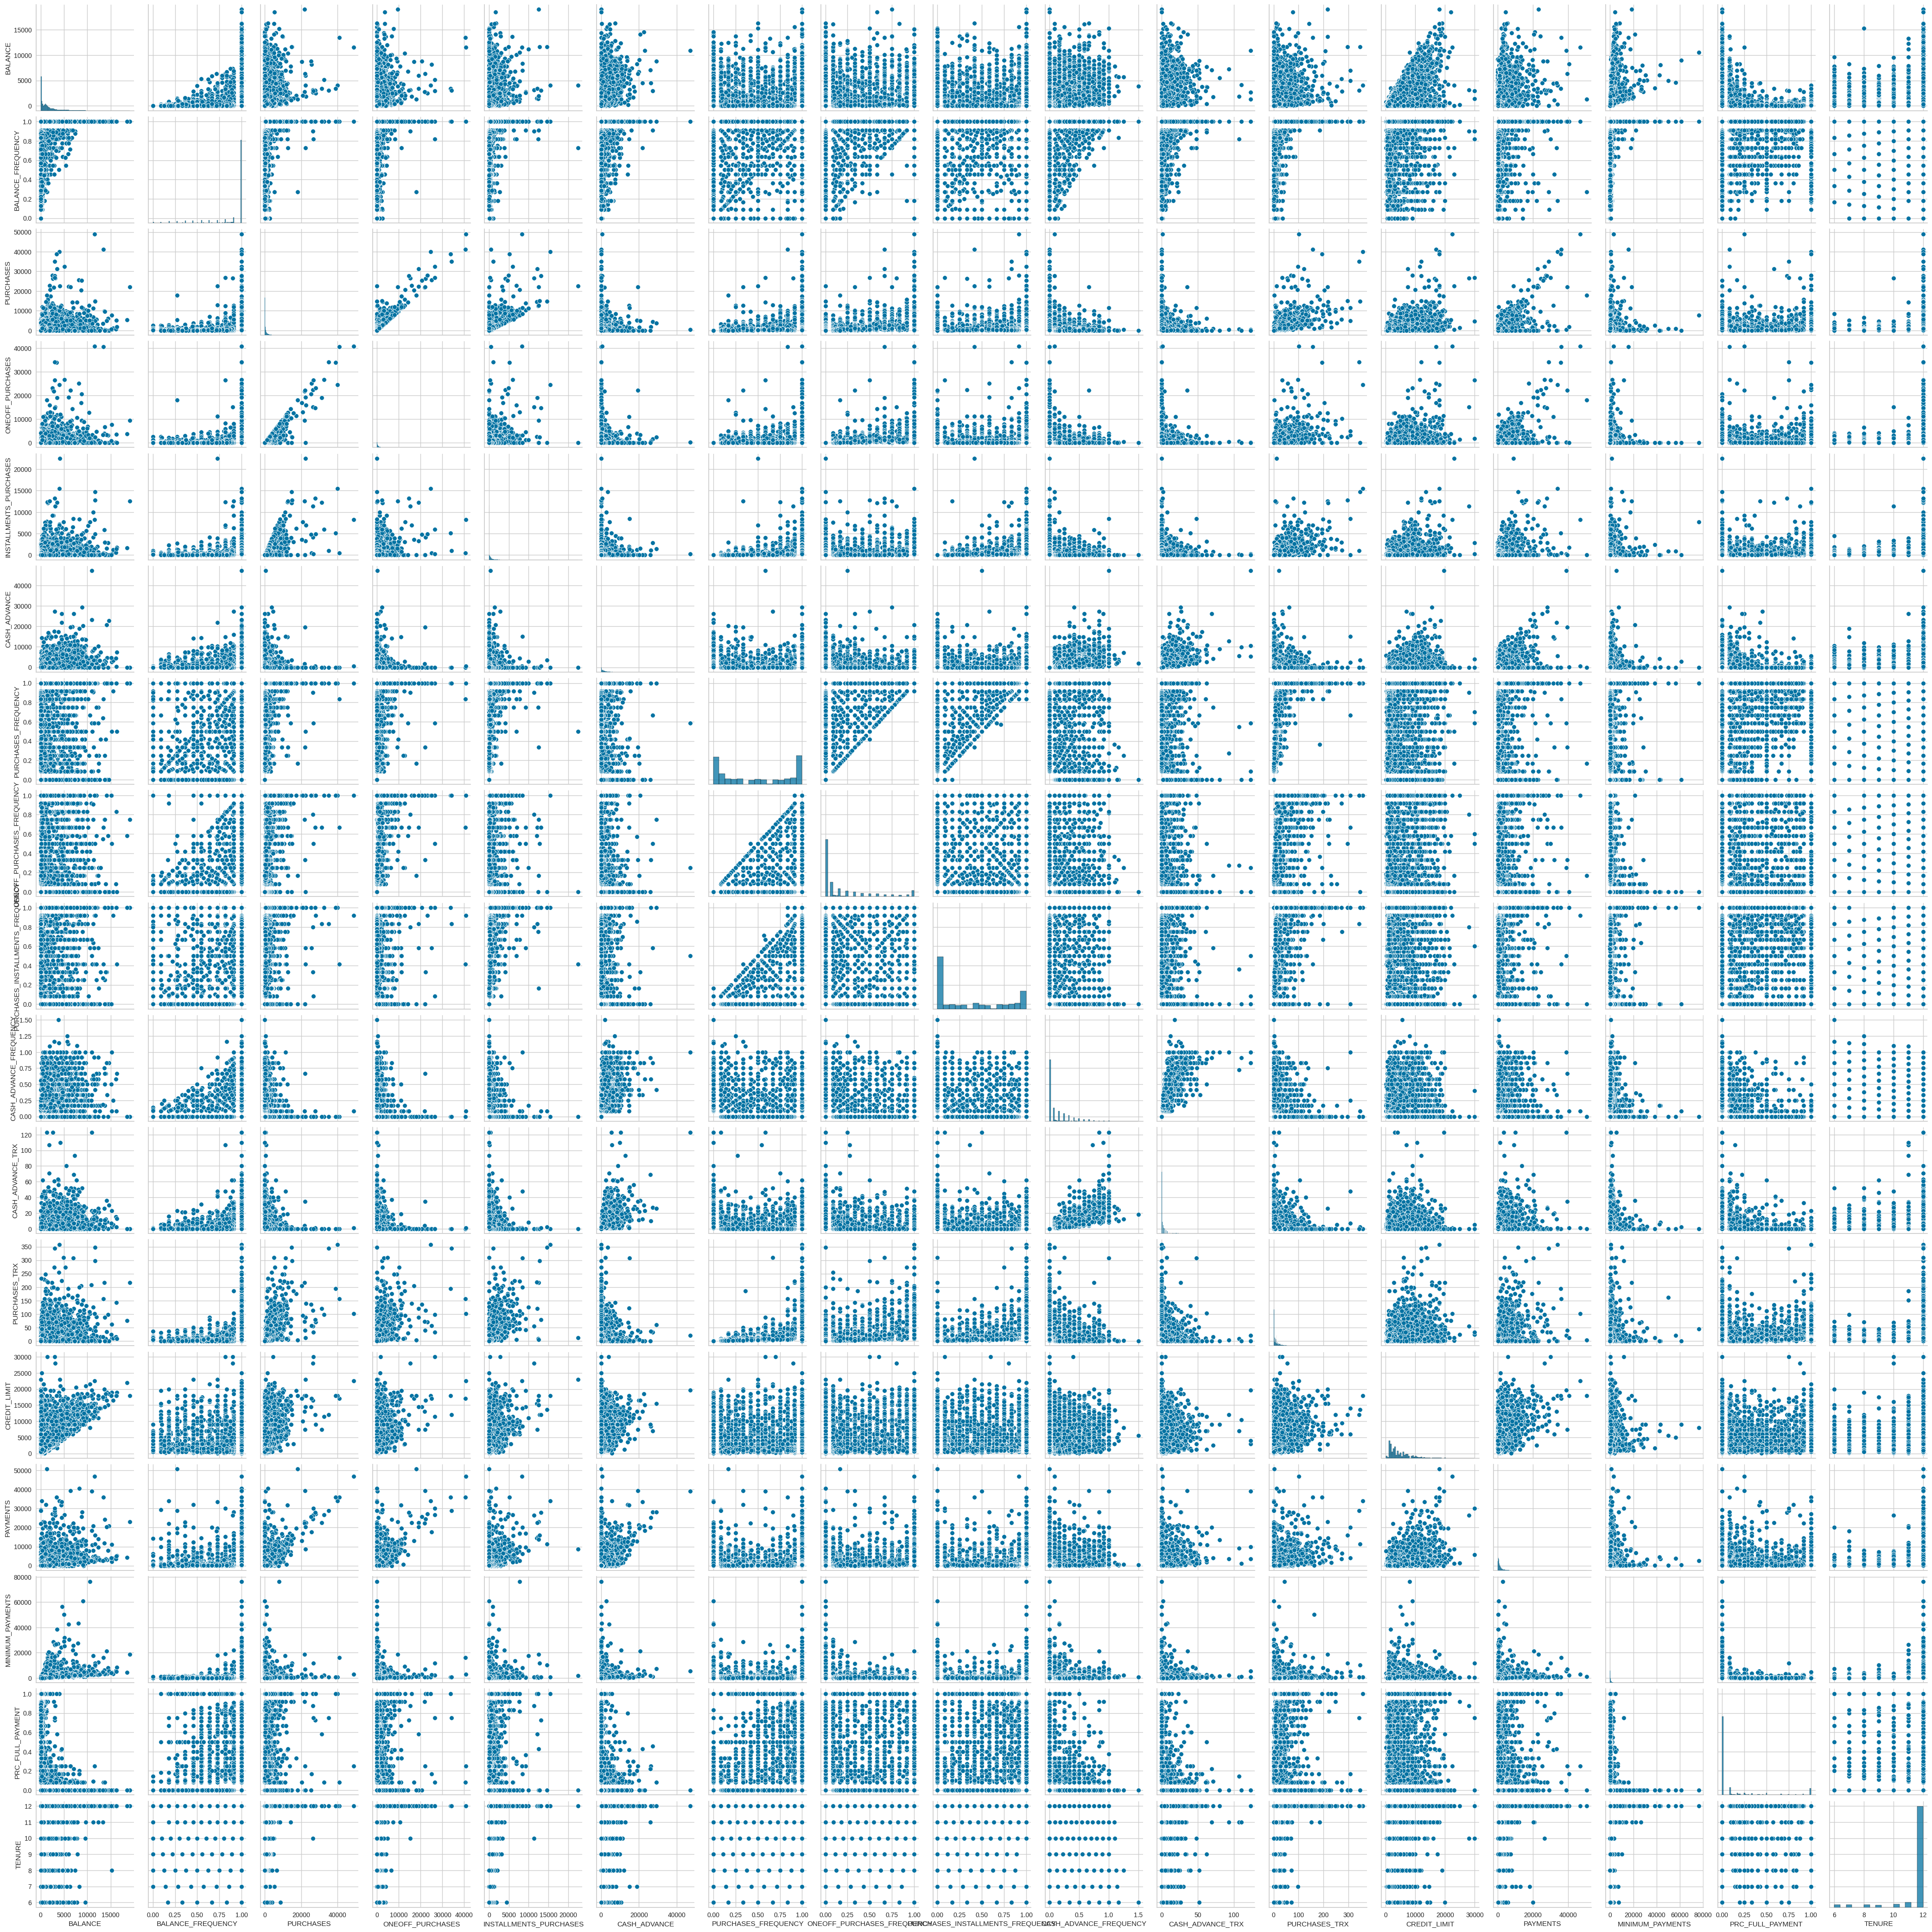

In [ ]:
# Data visualization to pairwise relationships in a dataset.

sns.pairplot(df)
plt.show()

### Variables - Visualize and Analyze

The following plot visualizes the relationships from the data frame (df) between:

- **'PURCHASES' and 'ONEOFF_PURCHASES'**
- **'CREDIT_LIMIT' and 'BALANCE'** variables
- **'BALANCE_FREQUENCY' and 'BALANCE'**
- **'TENURE' and 'BALANCE'** variables


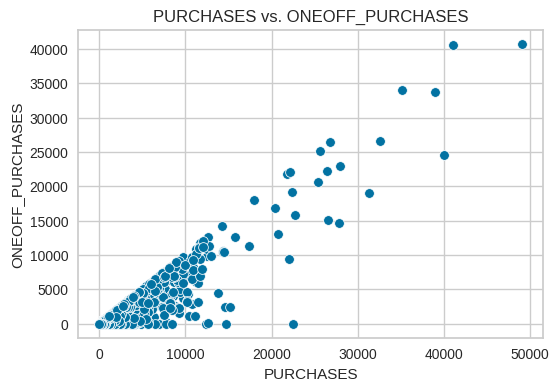

In [ ]:
# Plotting / visualize and analyze - Purchases Vs OneOff_Purchases

plt.figure(figsize=(6,4))
ax = plt.axes()
g = sns.scatterplot(x='PURCHASES', y='ONEOFF_PURCHASES', data=df)
g.set_title('PURCHASES vs. ONEOFF_PURCHASES')
plt.show()

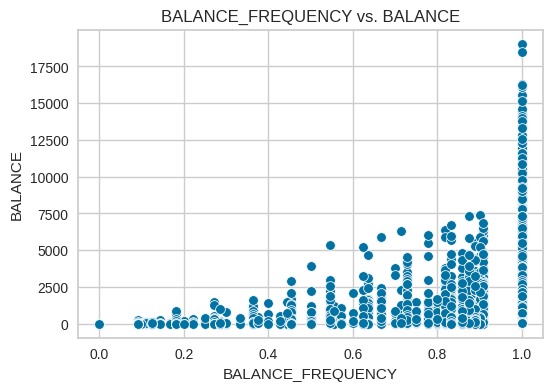

In [ ]:
# Plotting / visualize and analyze - Balance Vs Balance_Frequency

plt.figure(figsize=(6,4))
ax = plt.axes()
g = sns.scatterplot(x='BALANCE_FREQUENCY', y='BALANCE', data=df)
g.set_title('BALANCE_FREQUENCY vs. BALANCE')
plt.show()

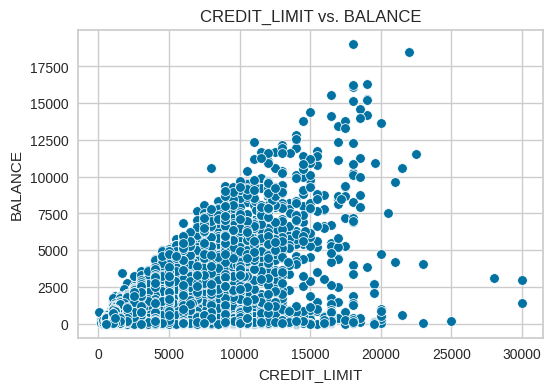

In [ ]:
# Plotting / visualize and analyze - Credit_Limit Vs Balance

plt.figure(figsize=(6,4))
ax = plt.axes()
g = sns.scatterplot(x='CREDIT_LIMIT', y='BALANCE', data=df)
g.set_title('CREDIT_LIMIT vs. BALANCE')
plt.show()

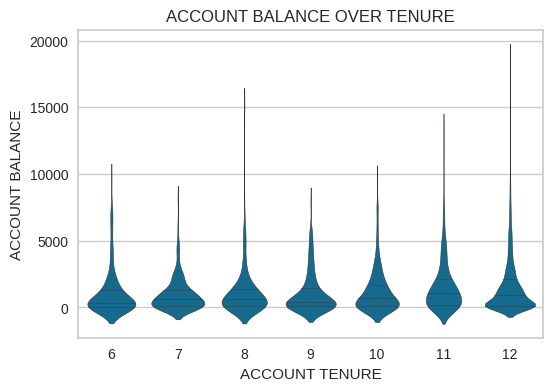

In [ ]:
# Plotting / visualize and analyze - Balance Vs Tenure

plt.figure(figsize=(6,4))
ax = plt.axes()
# ax.set_facecolor('darkgrey')
sns.violinplot(x='TENURE', y='BALANCE', data=df, inner='quartile')
plt.xlabel('ACCOUNT TENURE')
plt.ylabel('ACCOUNT BALANCE')
plt.title('ACCOUNT BALANCE OVER TENURE')
plt.show()

In [ ]:
A_cols = df.select_dtypes(include=['object']).columns.tolist()
B_cols = df.select_dtypes(exclude=['object']).columns.tolist()

### Dataset – Histograms Plot

The following plot creates and displays the distribution of numerical data through multiple histograms based on the specified columns in your dataset.


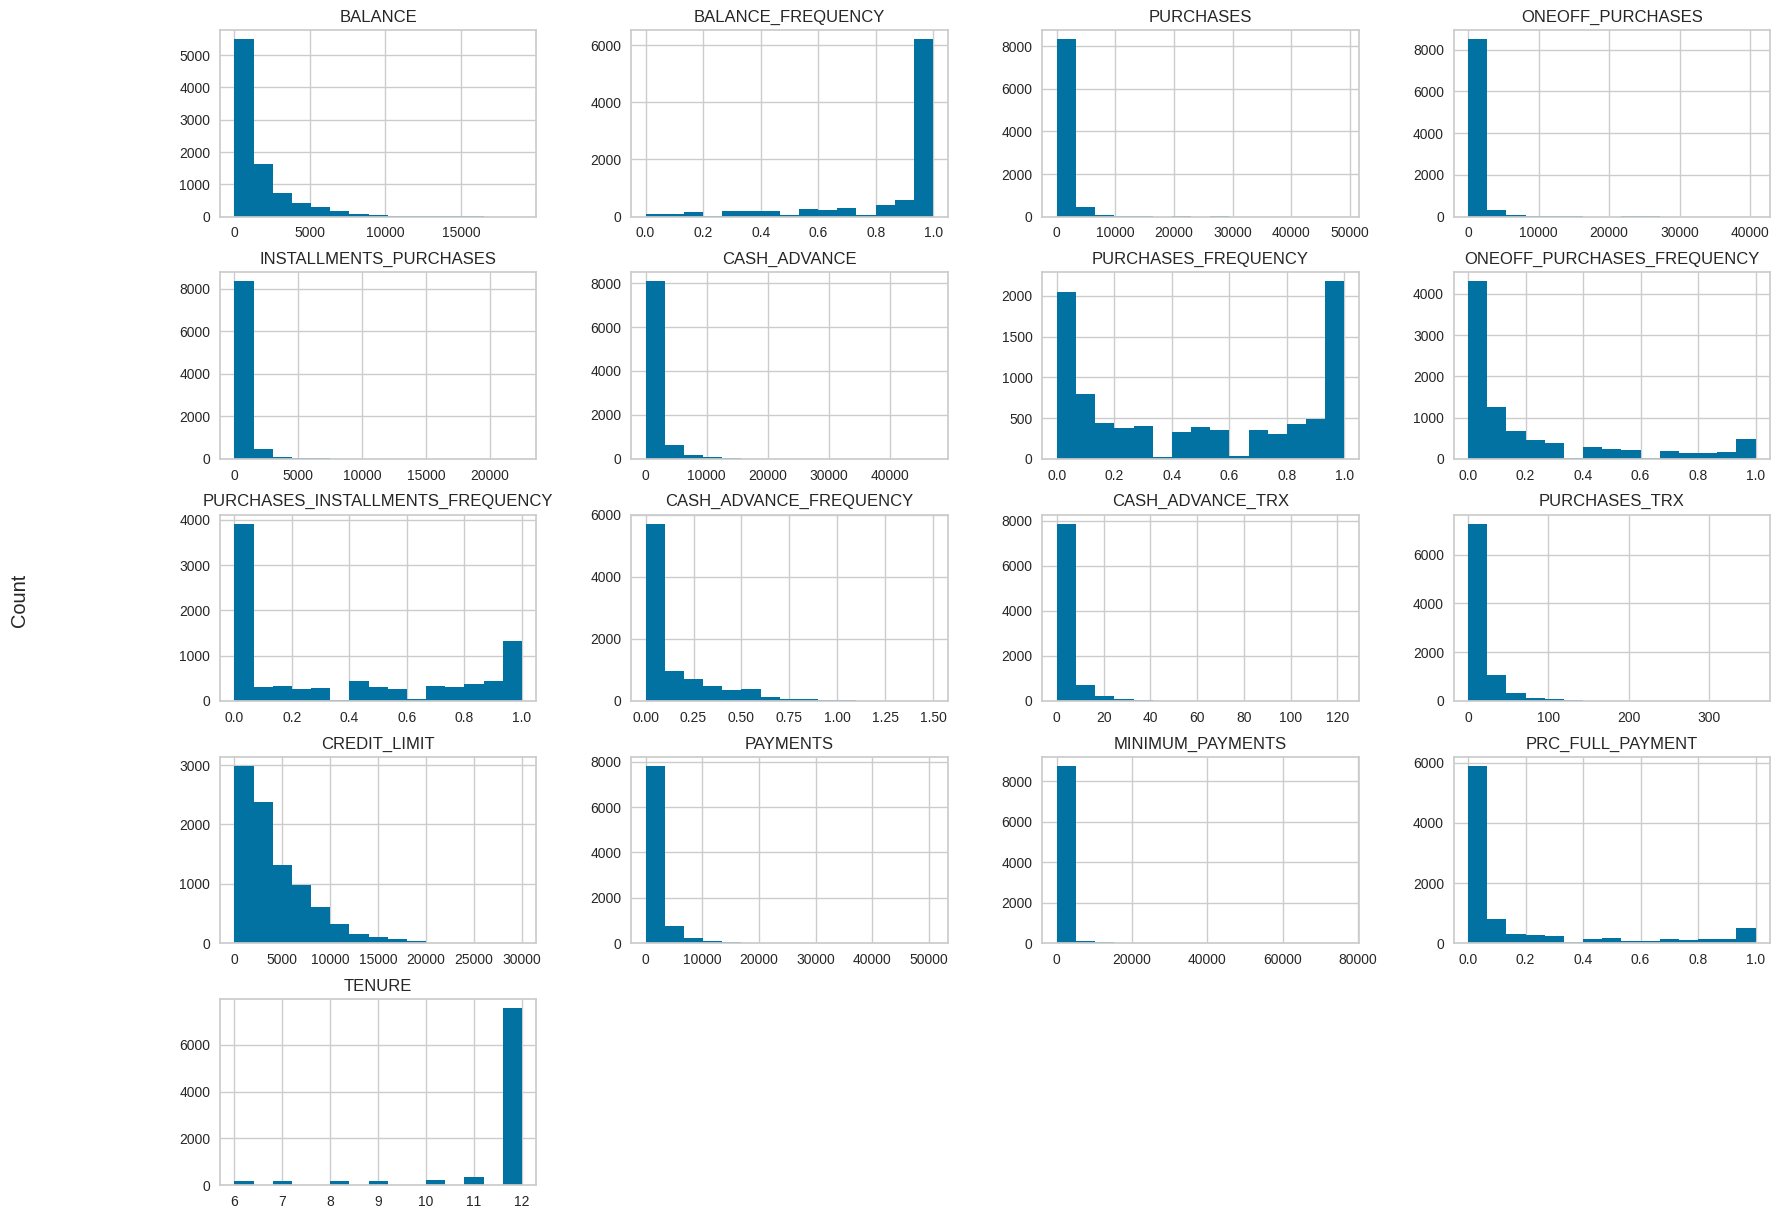

In [ ]:
# Histograms - Graphical Representations / Visualization of the Data distribution

df[B_cols].hist(bins=15, figsize=(20, 15), layout=(5, 4));
fig = plt.gcf()  # Get the current figure
fig.supylabel('Count')  # Set a common y-axis label
plt.show()


### Correlation Analysis
The correlation analysis is applied to describe the relationship between several numerical variables and identify irregularities and patterns.

The graph shows that there are not many features that are strongly correlated.


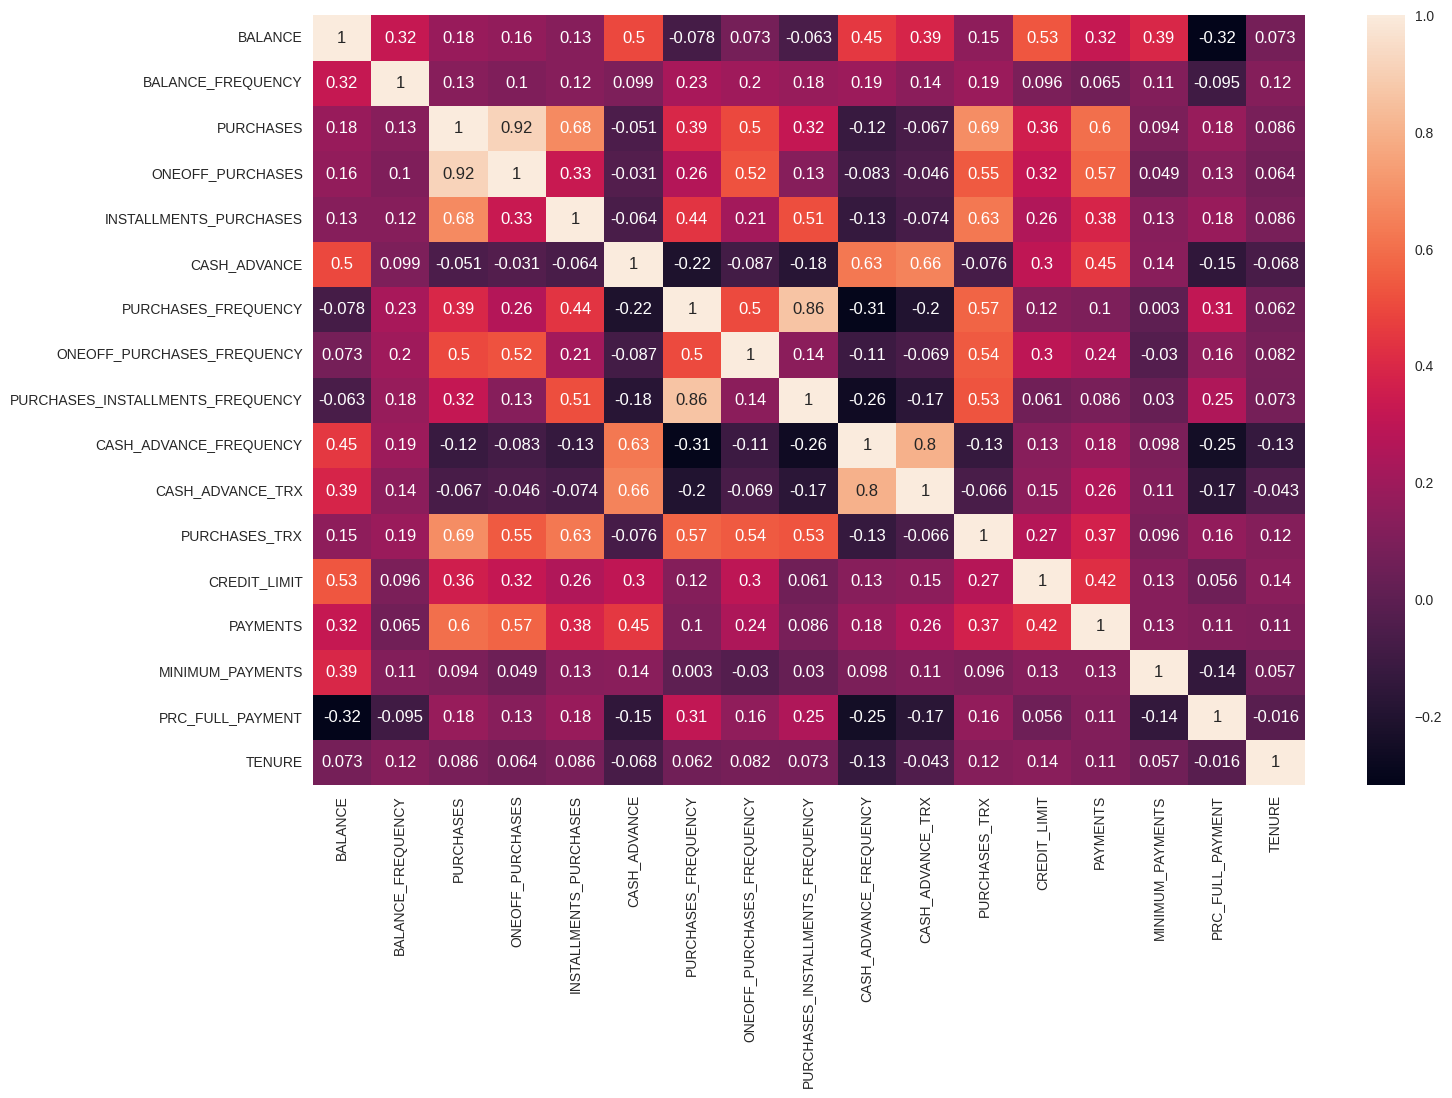

In [ ]:
# Correlation Matrix Heatmap Visualisation (Showing how each variable in the DataFrame related to every other variable in terms of correlation)

corr_matrix=df.corr()

plt.figure(figsize=(16,10))
sns.heatmap(corr_matrix, annot=True)
plt.show()

### Outlier Analysis
The outliers are data points that differ significantly from other observations. They are caused by various factors, such as measurement errors, data entry errors, or genuine variations in the dataset.
The approach for outlier analysis involves first to identify and visualize the outlier’s distribution, as illustrated in the plots below; then remove it accordingly.


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, 'BALANCE'),
  Text(1, 0, 'BALANCE_FREQUENCY'),
  Text(2, 0, 'PURCHASES'),
  Text(3, 0, 'ONEOFF_PURCHASES'),
  Text(4, 0, 'INSTALLMENTS_PURCHASES'),
  Text(5, 0, 'CASH_ADVANCE'),
  Text(6, 0, 'PURCHASES_FREQUENCY'),
  Text(7, 0, 'ONEOFF_PURCHASES_FREQUENCY'),
  Text(8, 0, 'PURCHASES_INSTALLMENTS_FREQUENCY'),
  Text(9, 0, 'CASH_ADVANCE_FREQUENCY'),
  Text(10, 0, 'CASH_ADVANCE_TRX'),
  Text(11, 0, 'PURCHASES_TRX'),
  Text(12, 0, 'CREDIT_LIMIT'),
  Text(13, 0, 'PAYMENTS'),
  Text(14, 0, 'MINIMUM_PAYMENTS'),
  Text(15, 0, 'PRC_FULL_PAYMENT'),
  Text(16, 0, 'TENURE')])

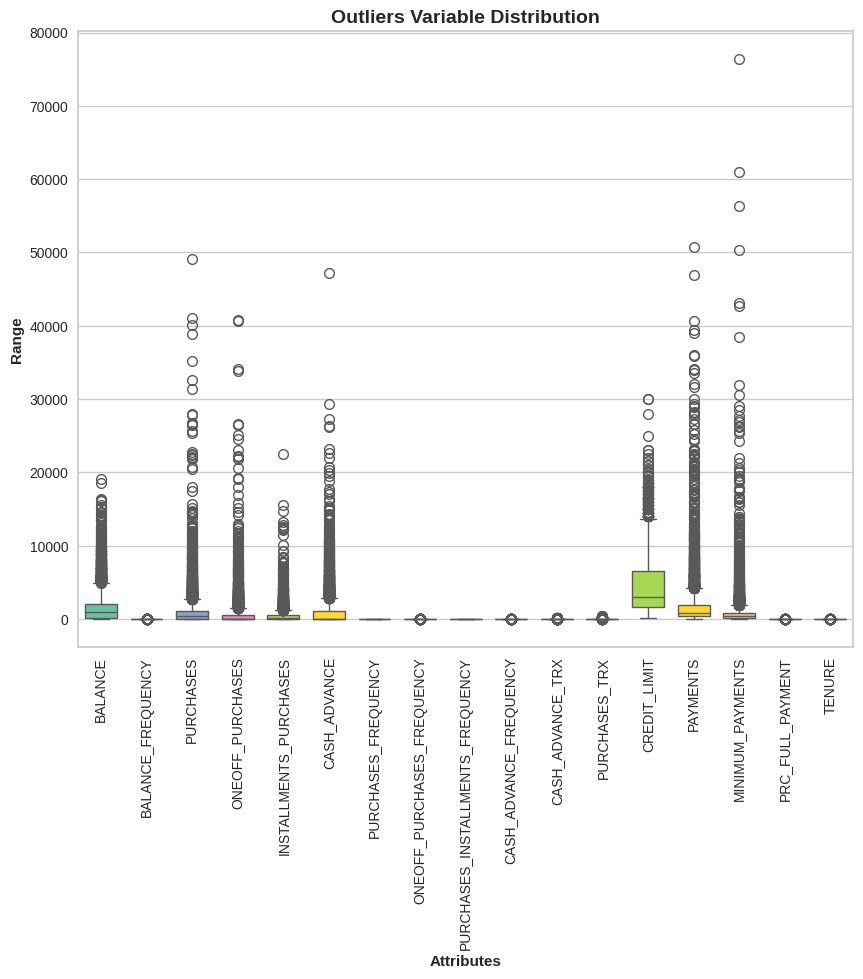

In [ ]:
# Outlier Analysis for all columns

num_attributes = [x for x in df.columns if df[x].dtype in ('float64','int64')]
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = df[num_attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')
plt.xticks(rotation=90)

Note : From the outlier analysis; the next approach will be to remove (statistical) outliers for numerical variables; below is an example for the BALANCE variable, and the same approach can be done for other variables.


In [ ]:
# Removing outliers from columns

# Removing (statistical) outliers for BALANCE
Q1 = df.BALANCE.quantile(0.05)
Q3 = df.BALANCE.quantile(0.95)
IQR = Q3 - Q1
df = df[(df.BALANCE >= Q1 - 1.5*IQR) & (df.BALANCE <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for PURCHASES
Q1 = df.PURCHASES.quantile(0.05)
Q3 = df.PURCHASES.quantile(0.95)
IQR = Q3 - Q1
df = df[(df.PURCHASES >= Q1 - 1.5*IQR) & (df.PURCHASES <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for ONEOFF_PURCHASES
Q1 = df.ONEOFF_PURCHASES.quantile(0.05)
Q3 = df.ONEOFF_PURCHASES.quantile(0.95)
IQR = Q3 - Q1
df = df[(df.ONEOFF_PURCHASES >= Q1 - 1.5*IQR) & (df.ONEOFF_PURCHASES <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for INSTALLMENTS_PURCHASES'
Q1 = df.INSTALLMENTS_PURCHASES.quantile(0.05)
Q3 = df.INSTALLMENTS_PURCHASES.quantile(0.95)
IQR = Q3 - Q1
df = df[(df.INSTALLMENTS_PURCHASES >= Q1 - 1.5*IQR) & (df.INSTALLMENTS_PURCHASES <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for CASH_ADVANCE
Q1 = df.CASH_ADVANCE.quantile(0.05)
Q3 = df.CASH_ADVANCE.quantile(0.95)
IQR = Q3 - Q1
df = df[(df.CASH_ADVANCE >= Q1 - 1.5*IQR) & (df.CASH_ADVANCE <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for CREDIT_LIMIT
Q1 = df.CREDIT_LIMIT.quantile(0.05)
Q3 = df.CREDIT_LIMIT.quantile(0.95)
IQR = Q3 - Q1
df = df[(df.CREDIT_LIMIT >= Q1 - 1.5*IQR) & (df.CREDIT_LIMIT <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for PURCHASES
Q1 = df.PAYMENTS.quantile(0.05)
Q3 = df.PAYMENTS.quantile(0.95)
IQR = Q3 - Q1
df = df[(df.PAYMENTS >= Q1 - 1.5*IQR) & (df.PAYMENTS <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for PURCHASES
Q1 = df.MINIMUM_PAYMENTS.quantile(0.05)
Q3 = df.MINIMUM_PAYMENTS.quantile(0.95)
IQR = Q3 - Q1
df = df[(df.MINIMUM_PAYMENTS >= Q1 - 1.5*IQR) & (df.MINIMUM_PAYMENTS <= Q3 + 1.5*IQR)]

## Model Development

### Feature Scaling

Scaling it's an essential step to align our dataset with machine learning models.
Standardizing the data through scaling ensures uniformity in the value magnitude, which is important for optimizing the performance of machine learning models. Through data scaling, it improve the model's capacity to identify patterns and relationships within the dataset. This process does not alter the core attributes of the data but ensures its compatibility with machine learning algorithms, and potentially boosting their predictive capabilities.

----



In [ ]:
df.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000        864.206542          0.000000      12  
4   678.334763        244.791237          0.000000      12

Approach for - Scaling the numerical features / Standardize the Data


In [ ]:
# Approach for - Scaling the numerical features / Standardize the Data
# Feature Scaling
scaler = StandardScaler()

df_scaled = scaler.fit_transform(df)
# Select only numeric columns
test_data_numeric = test_data.select_dtypes(include=['number'])

# Then apply scaling
test_data_scaled = scaler.fit_transform(test_data_numeric)

In [ ]:
df.dtypes

BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

### Modelling


##### Performing K-Means Clustering







Next 🡪 Let’s fit our standardized data using PCA

In [ ]:
# PCA (Principal Component Analysis) - Approach to reduce the dimensionality of the data to 8 principal components that will explain most of the variance in your data.

pca= PCA(n_components=8)
principal_comp=pca.fit_transform(df_scaled)

pca_df=pd.DataFrame(data=principal_comp,columns=["pca1","pca2","pca3","pca4","pca5","pca6","pca7","pca8"])
pca_df.head()

pca1      pca2      pca3      pca4      pca5      pca6      pca7  \
0 -1.509939 -1.749050 -0.230536  0.634807  0.183922  0.367774 -0.616655   
1 -2.038119  2.742228 -0.337255 -0.444708 -1.743587  0.311600  0.409602   
2  1.210442  0.136094 -1.596848  1.360154  1.150553  0.107963  1.474524   
3 -0.583110 -0.079918 -1.744954  1.064320 -0.430443 -0.772162 -0.281240   
4 -1.550113 -1.248060 -0.388275  0.953517  0.492095  0.625659 -0.201360   

       pca8  
0  0.194655  
1  0.896687  
2 -1.102777  
3 -0.525499  
4  0.678870


#### Defining Elbow Method
Next 🡪 Let’s first define the KMeans clustering models with varying numbers of clusters (k) ranging from 1 to 9.


In [ ]:
# Approach to Define the KMeans clustering models with varying numbers of clusters (k) ranging from 1 to 9.

kmeans_models = [KMeans(n_clusters = k, random_state = 42).fit(principal_comp) for k in range(1, 10)]

Before implementing K-Means, the first step is to calculate the optimal number of clusters using the elbow score.

In [ ]:
# Visualisation / Graph showing 'k' value by Elbow Method / optimun or ideal value for K
# Note : This approach will printed a radomn value of K

inertias = [model.inertia_ for model in kmeans_models]

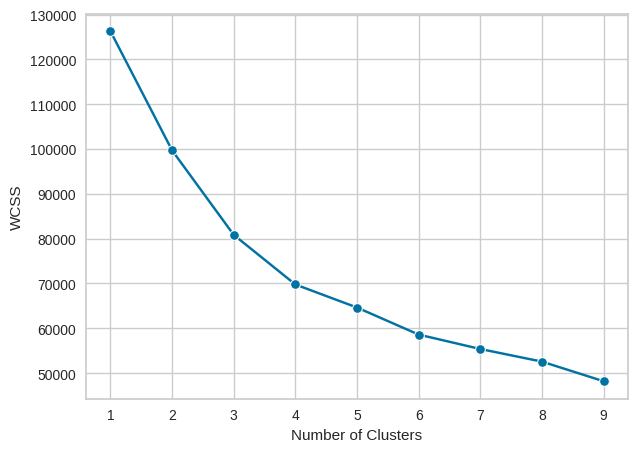

In [ ]:
fig = plt.figure(figsize = (7,5))
sns.lineplot(x = list(range(1, 10)), y = inertias, marker = 'o')
plt.xlabel("Number of Clusters")
plt.ylabel('WCSS')
plt.show()

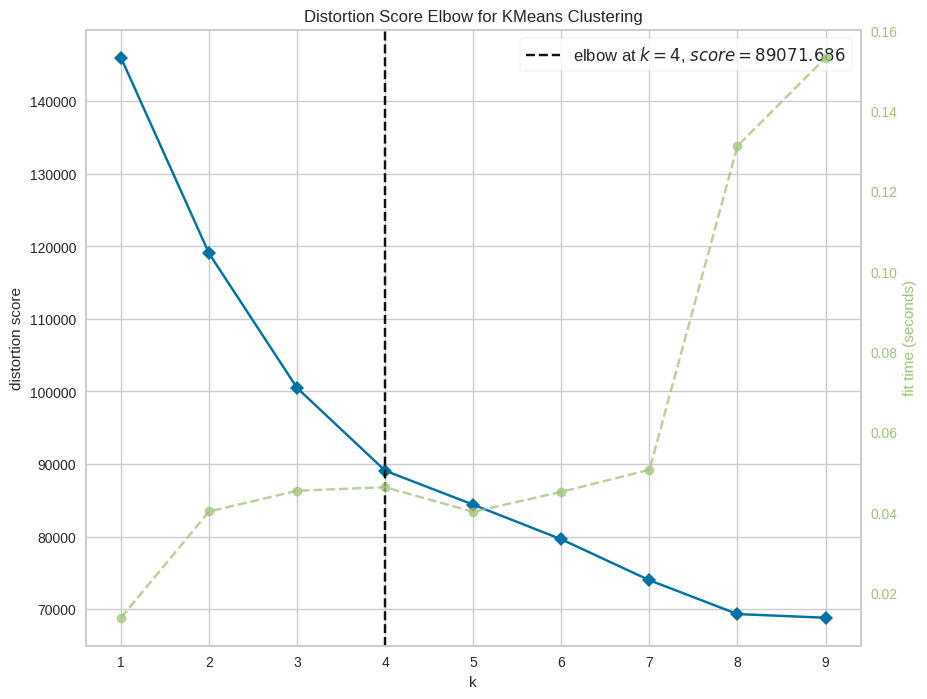

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
# Define the value of K = 4

# KMeans model
kmeans = KMeans(n_clusters=4, random_state=0)

# Instantiate the KElbowVisualizer with the KMeans model and the range of clusters to explore
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

# Fit the data to the visualizer
visualizer.fit(df_scaled)

# Finalize and render the figure
visualizer.show()

#### Silouette Sore



In [ ]:
# Determining the optimal number of clusters using Silhouette Score

range_n_clusters = list(range(2, 6))  # Testing from 2 to 6 clusters
silhouette_scores = []

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is: {silhouette_avg}")

For n_clusters = 2, the average silhouette_score is: 0.25947856041294315
For n_clusters = 3, the average silhouette_score is: 0.24455439419891165
For n_clusters = 4, the average silhouette_score is: 0.18564958331325637
For n_clusters = 5, the average silhouette_score is: 0.1960340238997263


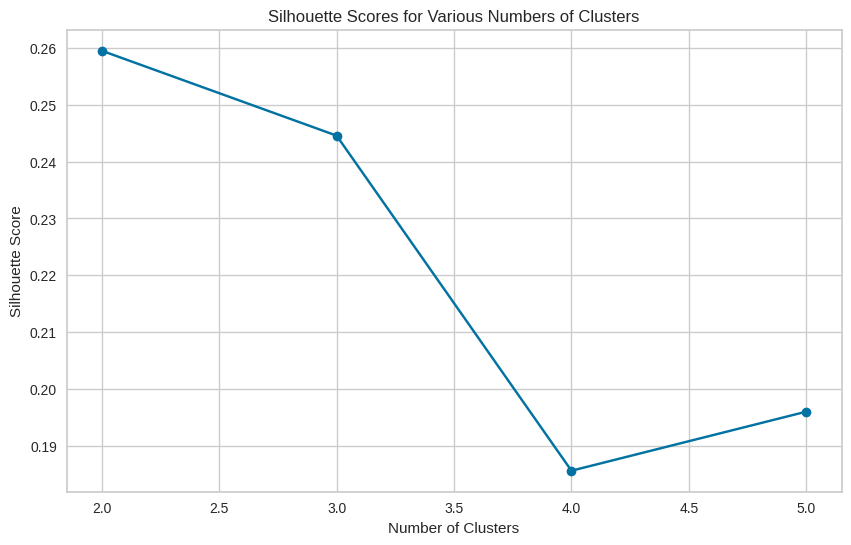

In [ ]:
# Plotting the Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Various Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

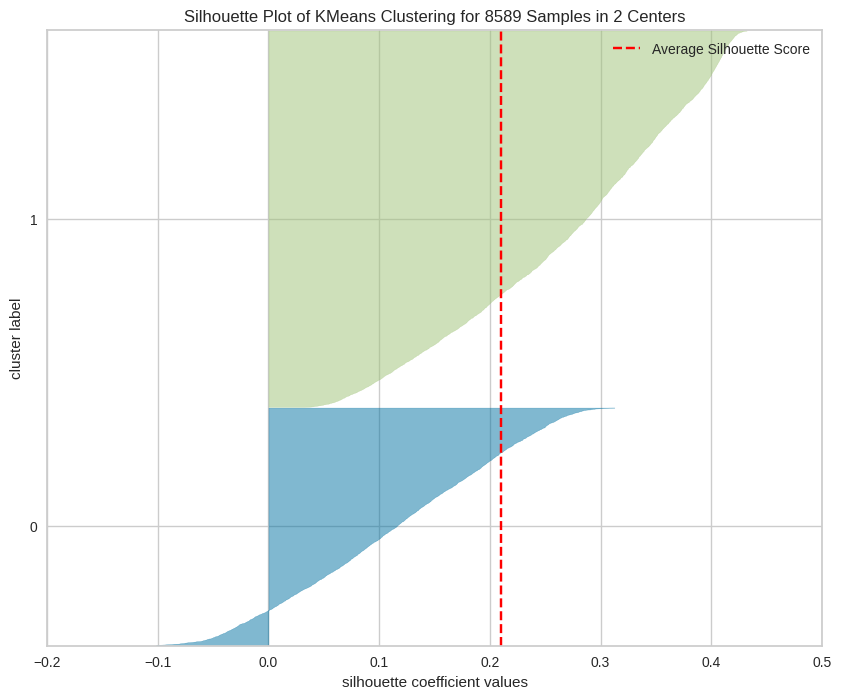

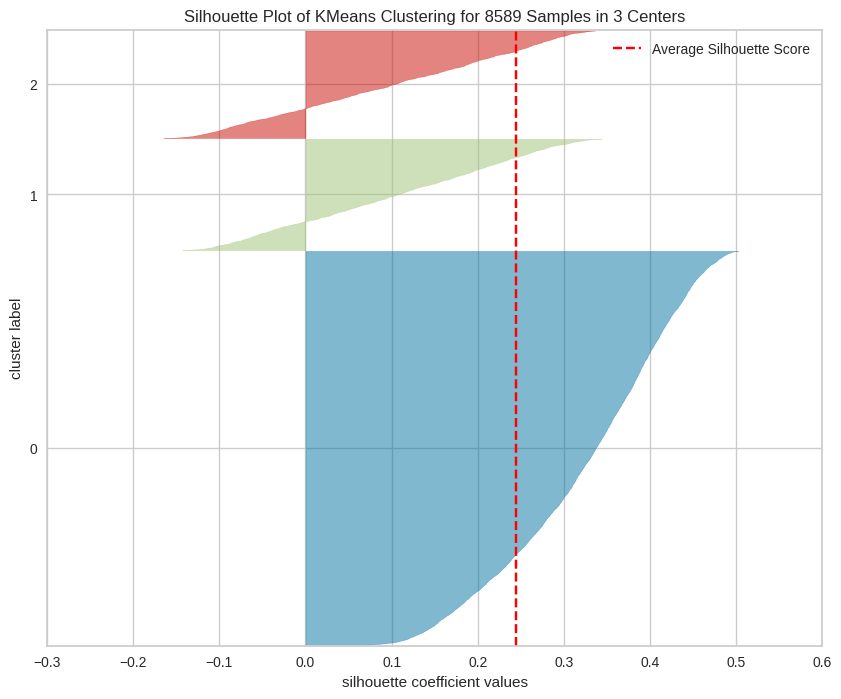

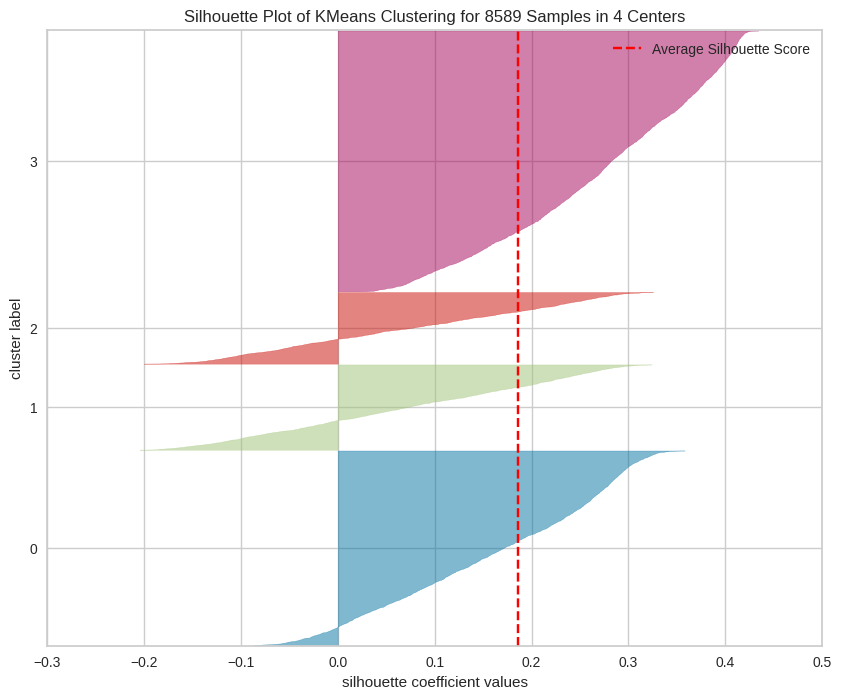

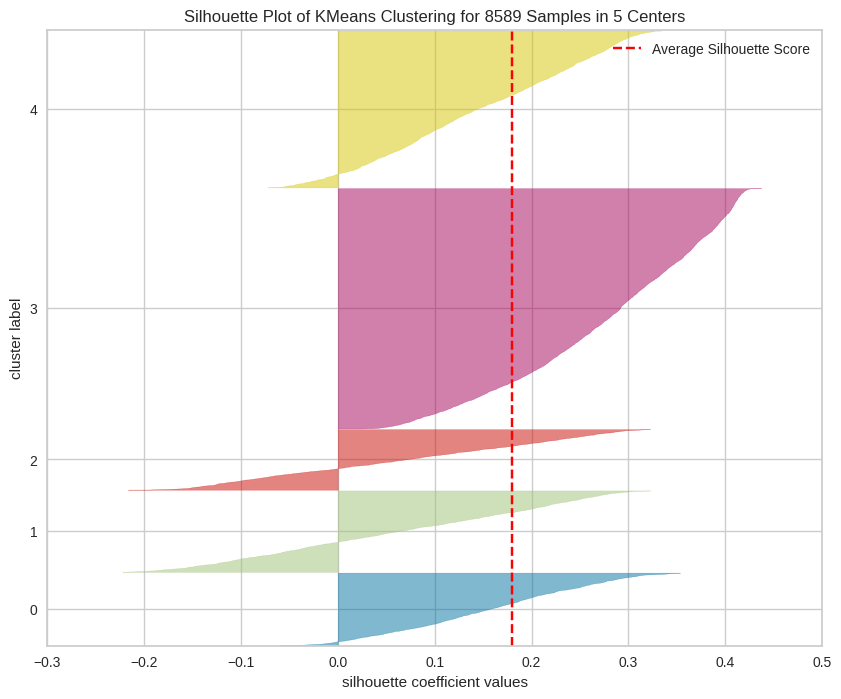

In [ ]:
# Approach to visualize the silhouette scores for different numbers of clusters in a KMeans clustering analysis

for i, n_cluster in enumerate(range(2,6)):
  kmeans = KMeans(n_clusters=n_cluster, random_state=0)
  visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', show_labels=True)
  visualizer.fit(df_scaled)
  visualizer.poof()

#### K-Means Visualisation




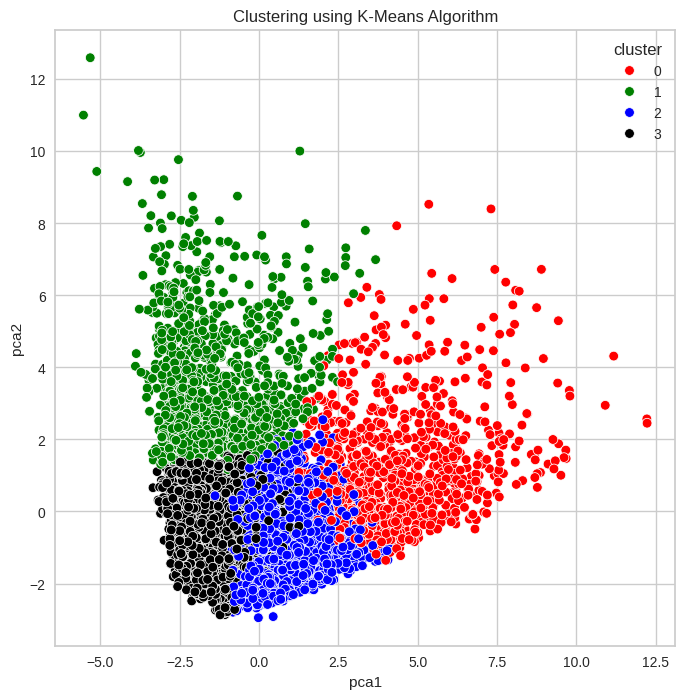

In [ ]:
# K-Means Clustering - Apply kmeans algorithm
kmeans_model=KMeans(4)
kmeans_model.fit_predict(df_scaled)
pca_df_kmeans= pd.concat([pca_df,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)
# visualize the clustered dataframe
plt.figure(figsize=(8,8))
#palette=['dodgerblue','red','green','blue','black','pink','gray','purple','coolwarm']
ax=sns.scatterplot(x="pca1",y="pca2",hue="cluster",data=pca_df_kmeans,palette=['red','green','blue','black'])
plt.title("Clustering using K-Means Algorithm")
plt.show()

### **GaussianMixture**

GMM - is a statistical model that represents data as a mixture of Gaussian (normal) distributions

In [ ]:
# Determining the optimal number of clusters using Silhouette Score

# Create empty list to store silhouette scores
S = []
K = range(2, 6)

for k in K:
    # Set up the GMM model with the specified number of components
    model = GaussianMixture(n_components=k, n_init=20, init_params='kmeans')
    # Fit the model and predict labels
    labels = model.fit_predict(df_scaled)
    # Calculate Silhouette Score and append to the list
    S.append(silhouette_score(df_scaled, labels, metric='euclidean'))
    # print the Silhouette Score
    S_avg = silhouette_score(df_scaled, labels)
    print(f"For n_components = {k}, the average silhouette_score is: {S_avg}")

For n_components = 2, the average silhouette_score is: 0.12663116077077768
For n_components = 3, the average silhouette_score is: 0.11700563215872604
For n_components = 4, the average silhouette_score is: 0.07780882347452653
For n_components = 5, the average silhouette_score is: 0.04093611671109645


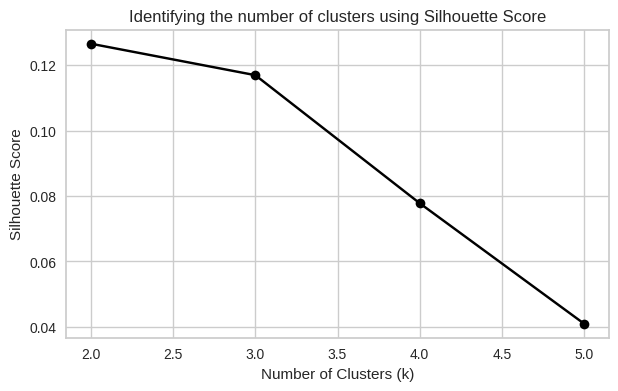

In [ ]:
# Plot the resulting Silhouette scores
plt.figure(figsize=(7, 4), dpi=100)
plt.plot(K, S, 'bo-', color='black')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Identifying the number of clusters using Silhouette Score')
plt.show()

From the Plot; it show the Gaussian Mixture Model clustering applied to identify clusters within a dataset and visualize them in a reduced-dimensional space, providing insights into patterns and groupings present in the data.


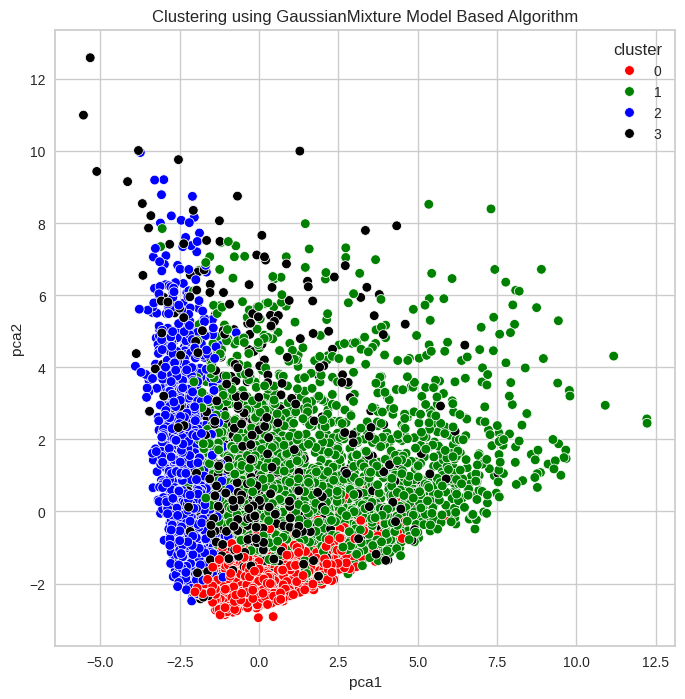

In [ ]:
GaussianMixture_model = GaussianMixture(n_components=4)
y_pred = GaussianMixture_model.fit_predict(df_scaled)
pca_df_gmm= pd.concat([pca_df,pd.DataFrame({'cluster':y_pred})],axis=1)
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="pca1",y="pca2",hue="cluster",data=pca_df_gmm,palette=['red','green','blue','black'])
plt.title("Clustering using GaussianMixture Model Based Algorithm")
plt.show()

From the scatter Plot Visualization; it show the Gaussian Mixture Model clustering applied to identify clusters within a dataset and visualize them in a reduced-dimensional space, providing insights into patterns and groupings present in the data.

### **Hierarchical Clustering (Agglomerative)**

Hierarchical clustering is a method of cluster analysis that builds a hierarchy of clusters

In [ ]:
# Determining the optimal number of clusters using Silhouette Score

# Range of clusters to evaluate
S = []
K = range(2, 6)

for k in K:
    # Initialize AgglomerativeClustering
    agg = AgglomerativeClustering(n_clusters=k)
    # Fit model and predict clusters
    cluster_labels = agg.fit_predict(df_scaled)
    # Calculate silhouette score and append to list
    S_avg = silhouette_score(df_scaled, cluster_labels)
    # print the Silhouette Score
    S.append(S_avg)
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is: {S_avg}")

For n_clusters = 5, the average silhouette_score is: 0.3420349754794735
For n_clusters = 5, the average silhouette_score is: 0.25176112569421594
For n_clusters = 5, the average silhouette_score is: 0.14479620924142522
For n_clusters = 5, the average silhouette_score is: 0.15386318627839535


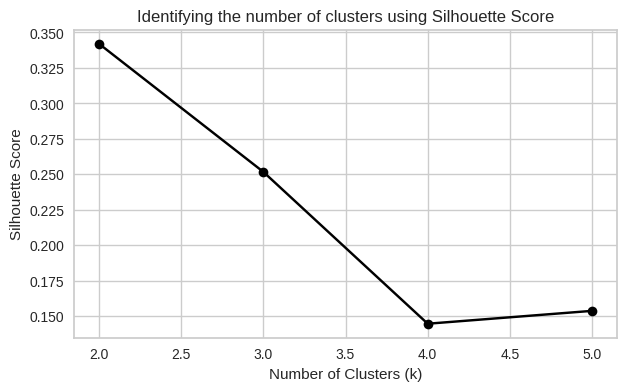

In [ ]:
# Plot the resulting Silhouette scores

plt.figure(figsize=(7, 4), dpi=100)
plt.plot(K, S, 'bo-', color='black')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Identifying the number of clusters using Silhouette Score')
plt.show()

The visualization helps in understanding the distribution and separation of clusters formed by the Agglomerative Clustering algorithm, and providing insights into patterns and groupings present in the data.


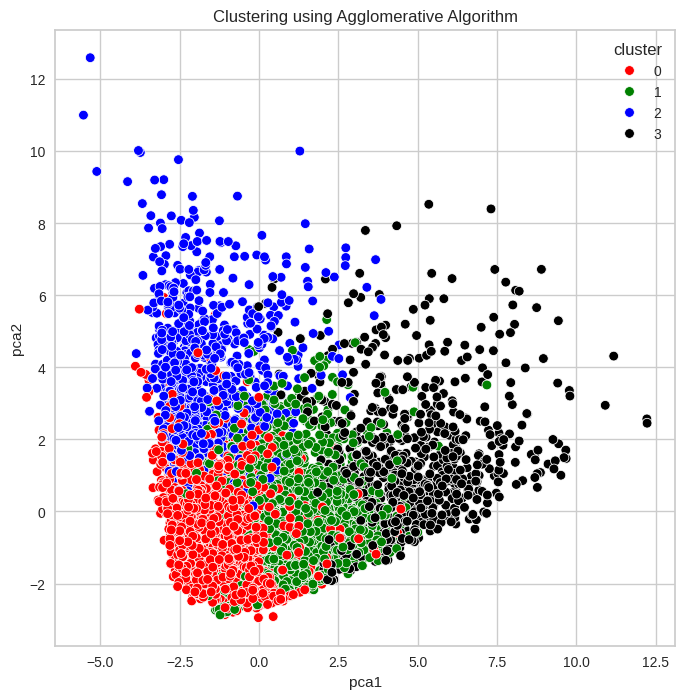

In [ ]:
agglo_model = AgglomerativeClustering(linkage="ward",n_clusters=4)
y_pred = agglo_model.fit_predict(df_scaled)
pca_df_aglo= pd.concat([pca_df,pd.DataFrame({'cluster':agglo_model.labels_})],axis=1)
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="pca1",y="pca2",hue="cluster",data=pca_df_aglo,palette=['red','green','blue','black'])
plt.title("Clustering using Agglomerative Algorithm")
plt.show()

The visualization helps in understanding the distribution and separation of clusters formed by the Agglomerative Clustering algorithm, & providing insights into patterns and groupings present in the data.

In [ ]:
# Range of clusters to evaluate
S = []
K = range(2, 6)

for k in K:
    # Initialize AgglomerativeClustering
    agg = AgglomerativeClustering(n_clusters=k)
    # Fit model and predict clusters
    cluster_labels = agg.fit_predict(df_scaled)
    # Calculate silhouette score and append to list
    S_avg = silhouette_score(df_scaled, cluster_labels)
    # print the Silhouette Score
    S.append(S_avg)
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is: {S_avg}")

For n_clusters = 5, the average silhouette_score is: 0.3420349754794735
For n_clusters = 5, the average silhouette_score is: 0.25176112569421594
For n_clusters = 5, the average silhouette_score is: 0.14479620924142522
For n_clusters = 5, the average silhouette_score is: 0.15386318627839535


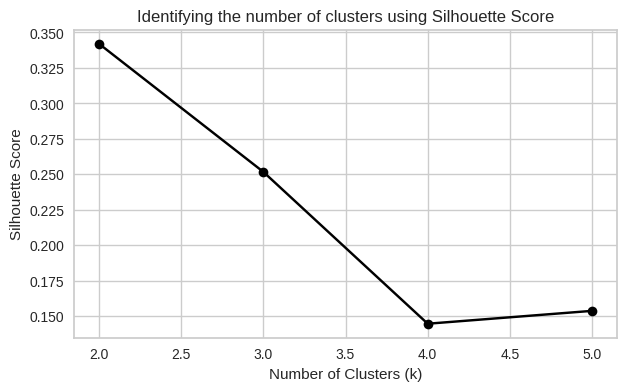

In [ ]:
# Plot the resulting Silhouette scores
plt.figure(figsize=(7, 4), dpi=100)
plt.plot(K, S, 'bo-', color='black')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Identifying the number of clusters using Silhouette Score')
plt.show()

## Analyze - Model Evaluation

There are numerous statistical metrics or methods available to evaluate a model. In our study, the evaluation metrics (Silhouette Score, Davies-Bouldin Index, and Calinski-Harabasz Index) will be considered; these metrics describe how well the data was clustered by the model.

### Silhouette Score
Measures how similar an object is to its own cluster compared to other clusters. The value ranges from -1 (incorrect clustering) to +1 (highly dense clustering), with scores around zero indicating overlapping clusters.

### Davies-Bouldin Index
The average 'similarity' between clusters, where the similarity is a measure that compares the distance between clusters with the size of the clusters themselves; lower values indicate better clustering.

### Calinski-Harabasz Index (Variance Ratio Criterion)
The ratio of the sum of between-clusters dispersion to within-cluster dispersion. High scores indicate clusters are dense and well-separated.

### Below Approach
The approach used to evaluate the different models is detailed below.

----



In [ ]:
from sklearn import metrics
from sklearn.metrics import davies_bouldin_score, silhouette_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler

In [ ]:
kmeans = KMeans(4)
kmeans.fit(df_scaled)
labels = kmeans_model.labels_

# Calculate and print the Silhouette Score
silhouette = metrics.silhouette_score(df_scaled, labels)
print("Silhouette Score : ", silhouette)

# Calculate and print the Calinski-Harabasz Index
calinski_harabasz = metrics.calinski_harabasz_score(df_scaled, labels)
print("Calinski-Harabasz: ", calinski_harabasz)

# Calculate and print the Davies-Bouldin Index
davies_bouldin = metrics.davies_bouldin_score(df_scaled, labels)
print("Davies-Bouldin   : ", davies_bouldin)

Silhouette Score :  0.1855585592525244
Calinski-Harabasz:  1829.3891398543535
Davies-Bouldin   :  1.647891476080506


In [ ]:
Gmm_model = GaussianMixture(n_components=4)
Gmm_labels = Gmm_model.fit_predict(df_scaled)

# Calculate and print the Silhouette Score
silhouette = metrics.silhouette_score(df_scaled, Gmm_labels)
print(f"Silhouette Score  : {silhouette}")

# Calculate and print the Calinski-Harabasz Index
calinski_harabasz_index = metrics.calinski_harabasz_score(df_scaled, Gmm_labels)
print(f"Calinski-Harabasz : {calinski_harabasz_index}")

# Calculate and print the Davies-Bouldin Index
davies_bouldin_index = metrics.davies_bouldin_score(df_scaled, Gmm_labels)
print(f"Davies-Bouldin    : {davies_bouldin_index}")

Silhouette Score  : 0.08888523092995532
Calinski-Harabasz : 802.7226293628343
Davies-Bouldin    : 3.005275458012342


In [ ]:
agglo_model = AgglomerativeClustering(linkage="ward",n_clusters=4)
agg_labels = agglo_model.fit_predict(df_scaled)

# Calculate and print the Silhouette Score
silhouette = metrics.silhouette_score(df_scaled, agg_labels)
print(f"Silhouette Score  : {silhouette}")

# Calculate and print the Calinski-Harabasz Index
calinski_harabasz_index = metrics.calinski_harabasz_score(df_scaled, agg_labels)
print(f"Calinski-Harabasz : {calinski_harabasz_index}")

# Calculate and print the Davies-Bouldin Index
davies_bouldin_index = metrics.davies_bouldin_score(df_scaled, agg_labels)
print(f"Davies-Bouldin    : {davies_bouldin_index}")

Silhouette Score  : 0.14479620924142522
Calinski-Harabasz : 1422.977130591173
Davies-Bouldin    : 1.9182891848022057



<div align="center">

| Model               | Davies-Bouldin Index | Silhouette Score | Calinski-Harabasz Index |
|---------------------|----------------------|------------------|-------------------------|
| K-Means             | 1.647466291015152    | 0.18579999848578388 | 1829.3927271369603      |
| GMM                 | 3.026489194621547    | 0.09004318004525669 | 799.2185891108142       |
| Hierarchical / Agg  | 1.9182891848022057   | 0.14479620924142522 | 1422.977130591173       |

</div>



### Analyze - Description of Columns / Variables and Clusters
This section describe the meaning of each clusters vs the variable; and figure 19 shows the sample of  purchase vs cluster 🡪 For the full view of all the column and dataset referred to the Notebook.


In [ ]:
final_df = df.copy()
final_df.dropna(inplace=True)
final_df['Cluster'] = kmeans.labels_

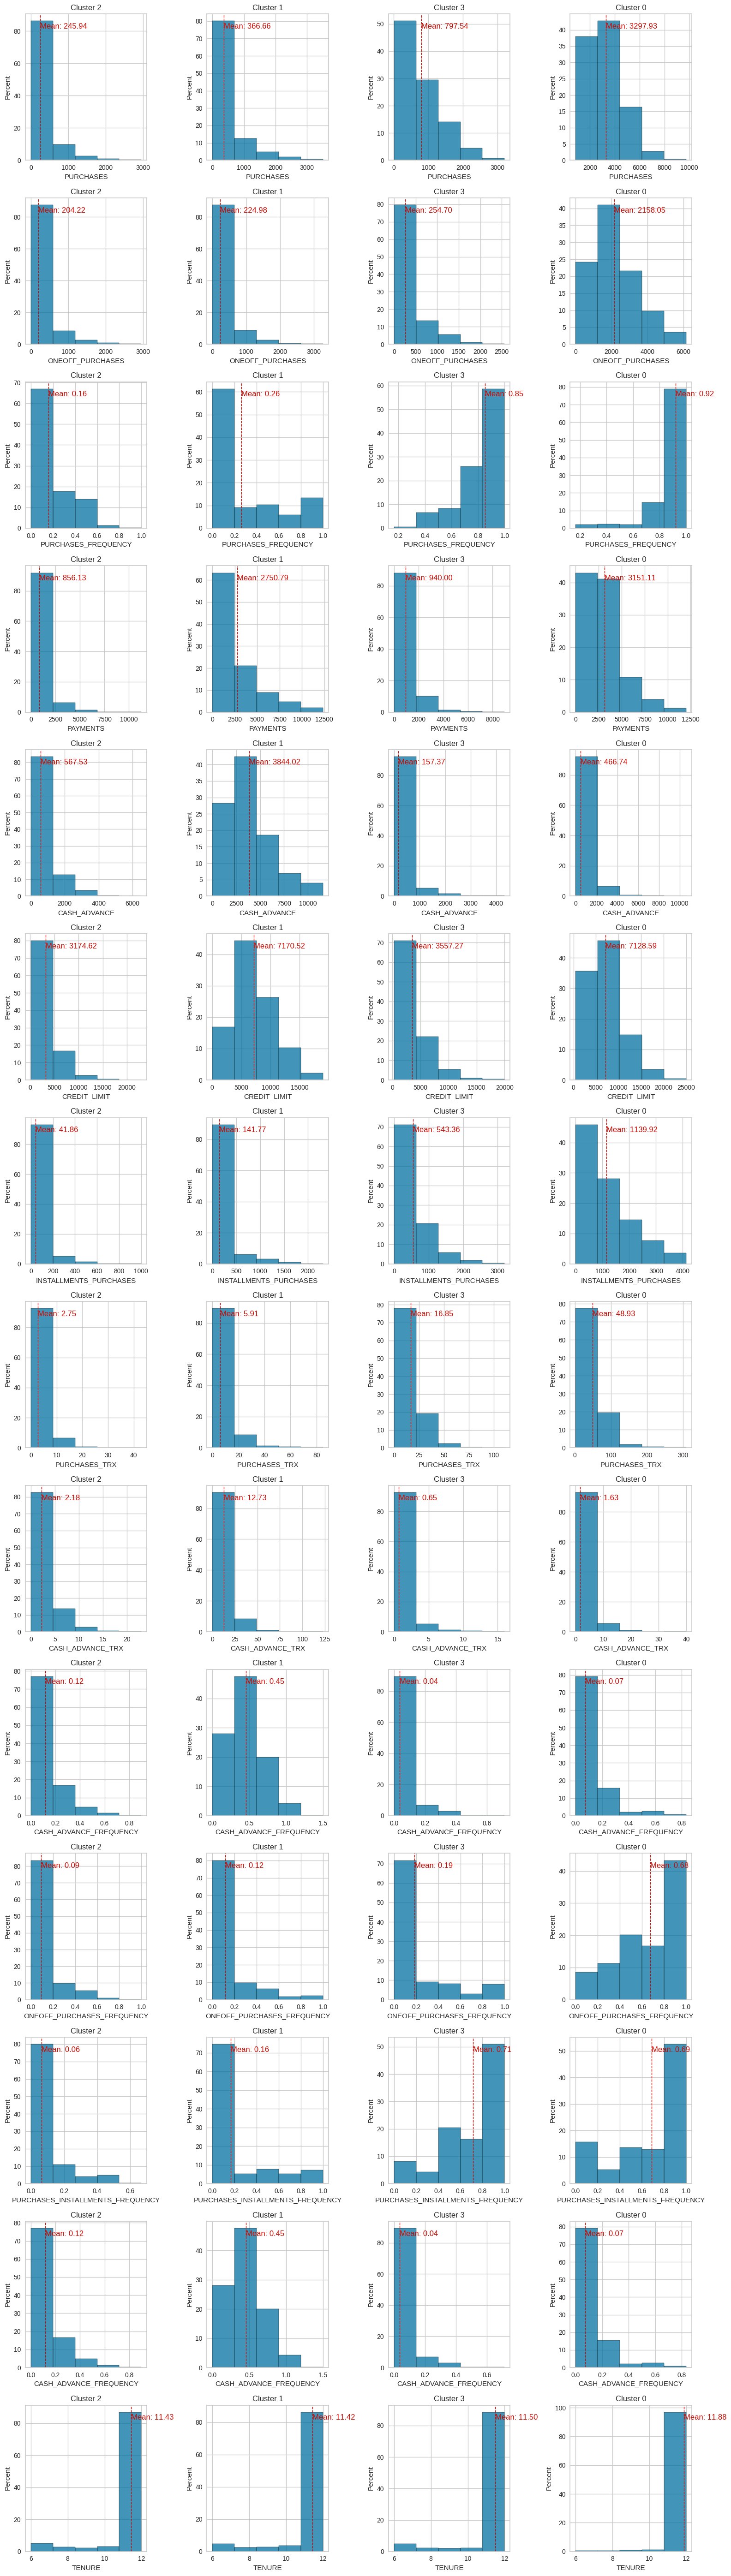

In [ ]:
# Define the columns and clusters
cols = ['PURCHASES', 'ONEOFF_PURCHASES' ,'PURCHASES_FREQUENCY','PAYMENTS', 'CASH_ADVANCE','CREDIT_LIMIT' ,'INSTALLMENTS_PURCHASES', 'PURCHASES_TRX',
        'CASH_ADVANCE_TRX', 'CASH_ADVANCE_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
        'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'TENURE']
clusters = final_df['Cluster'].unique()

# Set up subplots
num_rows = len(cols)
num_cols = len(clusters)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 4*num_rows))

# Loop through each feature
for i, col in enumerate(cols):
    # Loop through each cluster
    for j, cluster in enumerate(clusters):
        # Select data points belonging to the current cluster
        data = final_df[final_df['Cluster'] == cluster][col]
        # Plot histogram for the current cluster in the current subplot
        sns.histplot(data, bins=5, ax=axes[i, j], stat='percent')
        axes[i, j].set_title(f'Cluster {cluster}')
        axes[i, j].set_xlabel(col)
        axes[i, j].set_ylabel('Percent')

        # Calculate mean
        mean_value = np.mean(data)
        # Annotate with mean value
        axes[i, j].axvline(mean_value, color='r', linestyle='--', linewidth=1)
        axes[i, j].text(mean_value, axes[i, j].get_ylim()[1]*0.9, f'Mean: {mean_value:.2f}', color='r')

# Adjust layout
plt.tight_layout()
plt.savefig('my_cluster_plot.jpg', dpi=300)
plt.show()

## Saving Models

In [ ]:
import pickle

# For KMeans
with open('kmeans_model.pkl', 'wb') as file:
    pickle.dump(kmeans, file)
with open('kmeans_labels.pkl', 'wb') as file:
    pickle.dump(labels, file)

# For Gaussian Mixture Model
with open('gmm_model.pkl', 'wb') as file:
    pickle.dump(Gmm_model, file)
with open('gmm_labels.pkl', 'wb') as file:
    pickle.dump(Gmm_labels, file)

# For Agglomerative Clustering
with open('agglo_model.pkl', 'wb') as file:
    pickle.dump(agglo_model, file)
with open('agglo_labels.pkl', 'wb') as file:
    pickle.dump(agg_labels, file)


In [109]:
# test_data_scaled
with open('kmeans_model.pkl', 'rb') as file:
    kmeans_loaded = pickle.load(file)

new_labels = kmeans_loaded.predict(test_data_scaled)

print("Predicted cluster labels for new data:", new_labels)

Predicted cluster labels for new data: [2 2 3 3 0 3 1 3 3 1 3 2 0 2 3 3 2 1 2 2 2 2 3 2 1 0 2 3 1 0 1 2 2 2 2 0 3
 3 3 2 3 3 3 0 3 3 3 2 0 3 3 2 2 3 3 3 2 1 3 1 2 2 2 3 0 2 2 2 2 0 1 2 3 3
 2 2 2 3 0 2 2 0 2 3 2 1 1 1 0 2 3 3 3 2 3 2 3 3 3 1]


In [111]:
#Mapping of cluster labels to their meanings
cluster_names = {
    0: "Cluster 0-Moderate Use, Newer Customers",
    1: "Cluster 1-High Balance, Credit-Focused Users",
    2: "Cluster 2-Cash Advance Users with Longer Tenure",
    3: "Cluster 3-High-Spending Active Users"
}

# Replace cluster labels with their descriptive names
new_labels_named = np.array([cluster_names[label] for label in new_labels])

# Now, if you want to count the number of customers in each named cluster
(unique_named, counts_named) = np.unique(new_labels_named, return_counts=True)
frequencies_named = dict(zip(unique_named, counts_named))

print("Number of customers in each cluster:")
print()
for cluster_name, count in frequencies_named.items():
    print(f"{cluster_name}: {count} customers")


Number of customers in each cluster:

Cluster 0-Moderate Use, Newer Customers: 12 customers
Cluster 1-High Balance, Credit-Focused Users: 13 customers
Cluster 2-Cash Advance Users with Longer Tenure: 38 customers
Cluster 3-High-Spending Active Users: 37 customers


## Conclusion


### Overview of the Objective

The objective of this study is to develop customer segmentation using an unsupervised machine learning approach, aiming to perform effective marketing strategies.

Throughout the study, we defined and understood the theory behind the k-means clustering machine learning algorithm, along with the approach used to obtain the optimal number of clusters.

In our exploration of clustering, we applied three algorithms namely K-Means, GMM, and hierarchical clustering with a target of 4 clusters. Prior to clustering, PCA was implemented to reduce the dimensionality of the dataset, enhancing the quality of segmentations.

K-Means model approach was applied for categorizing the dataset into distinct clusters, with the elbow method guiding our quest for determining the optimal number of clusters.

From our modeling result, based on the provided metrics, K-means appears to be a good model among the three for this particular dataset. It has achieved the highest internal consistency (as shown by the Silhouette Score), the best definition of clusters (as indicated by the Calinski-Harabasz Index), and reasonable separation (as evidenced by its Davies-Bouldin Index).

Customer segmentation plays a vital role in understanding and effectively targeting different customer groups. The implementation of the K-means clustering approach can help leverage the analysis of customer data, gain valuable insights as well as unlock the full potential of customer data, and enhance their overall business marketing strategy performance.


